In [1]:
pip install Graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier , export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#Setting random seed.
seed = 10

In [3]:
from sklearn import datasets
dataset=datasets.load_iris()
df=pd.read_csv('C:\\Users\\TOSHIBA\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv', 
                            delimiter=",",
                            header=0 ,
                            names=['sepal length (cm)','sepal width (cm)',
                                 'petal length (cm)','petal width (cm)','Variety'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
#Creating a LabelEncoder and fitting it to the dataset label.
le = LabelEncoder()
le.fit(df['Variety'].values)
#Converting dataset str labels to int labels.
y = le.transform(df['Variety'].values)
#Extracting the instance data.
x = df.drop('Variety', axis=1).values

#Splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.34, stratify=y, random_state=seed)

In [10]:

tree = DecisionTreeClassifier(criterion= 'gini',
                             min_samples_leaf=5,
                             min_samples_split=5,
                             max_depth=None,
                             random_state=seed)
tree.fit(x_train, y_train)
y_pred= tree.predict(x_test)
accuracy= accuracy_score(y_test,y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.9615384615384616


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels= df['Variety'].unique()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.94      0.94        18
           2       0.94      0.94      0.94        17

    accuracy                           0.96        52
   macro avg       0.96      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52



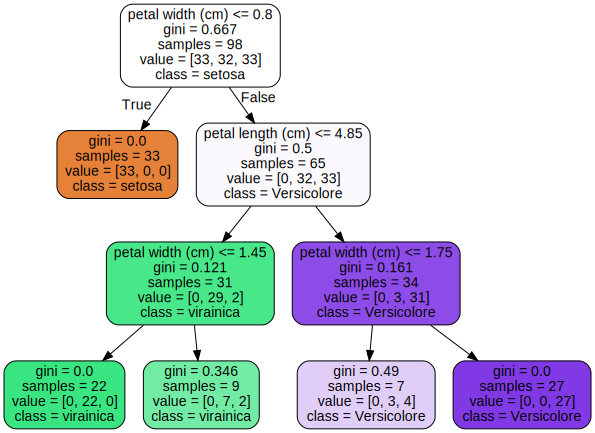

In [24]:
import os 
os.environ["PATH"]+= os.pathsep + r'C:\Program Files\Graphviz\bin'

def plot_tree(tree, dataframe, label_col, label_encoder, plot_title):
    label_names = ['setosa','virainica','Versicolore']
    #obtaninig plot data.
    graph_data = export_graphviz(tree,
                                feature_names= dataframe.drop(label_col, axis=1).columns,
                                class_names=label_names,
                                filled=True,
                                rounded=True,
                                out_file=None)
    #Genarating  plot
    graph = graphviz.Source(graph_data)
    graph.render(plot_title)
    return graph
tree_graph = plot_tree(tree, df, 'Variety', le, 'iris')
tree_graph

In [35]:
import pandas as pd
data=pd.read_csv('C:\\Users\\TOSHIBA\\Desktop\\مستودع البيانات والتنقيب\\لابات\\Lab09\\golf-dataset.csv')

In [36]:
data

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [66]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.preprocessing import LabelEncoder
#Creating a LabelEncoder and fitting it to the dataset label.
le = LabelEncoder()
le.fit(data['Play Golf'].values)
#Converting dataset str labels to int labels.
y = le.transform(data['Play Golf'].values)
#Extracting the instance data.
x = data.drop('Play Golf', axis=1).values
Outlook=le.fit_transform(data['Outlook'])
Temp=le.fit_transform(data['Temp'])
Humidity=le.fit_transform(data['Humidity'])
Windy=le.fit_transform(data['Windy'])
Play=le.fit_transform(data['Play Golf'])
#Splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.34, stratify=y, random_state=seed)

In [52]:
model = BernoulliNB()
#train the model using the training sets
model =model.fit(x_train, y_train)
y_pred= model.predict(x_test)
accuracy= accuracy_score(y_test,y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.3269230769230769


In [ ]:
wheather_

In [55]:
Outlook= le.fit_transform(data['Outlook'].values)
Temp= le.fit_transform(data['Temp'].values)
Humidity= le.fit_transform(data['Humidity'].values)
Windy= le.fit_transform(data['Windy'].values)
Play= le.fit_transform(data['Play Golf'].values)
print("Outlook:",Outlook)
print("Temp:",Temp)
print("Humidity:",Humidity)
print("Windy:",Windy)
print("Play:",Play)

Outlook: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Windy: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [63]:
#Combinig weather and temp into sigle listof tuples
features= zip(Outlook,Temp,Humidity,Windy)
features_ls= list(features)
print(features_ls)

[(1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1)]


In [65]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
model= BernoulliNB()

model.fit(features_ls,y)

predicted= model.predict([[1, 2, 0, 0]]) #0:Overcast, 2:Mild
print("predicted Value:", predicted)

predicted Value: [0]
